In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uszipcode import ZipcodeSearchEngine
import numpy as np

explorer = DataExplorer()

In [2]:
def plot3d(X,x,y,z,points,title):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    for i in range(points):
        ax.scatter(X.results[i][x], X.results[i][y],X.results[i][z], c=colors[X.results[i][12]])
    ax.set_title(title)
    return fig

In [3]:
def custPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Clusters')
    plt.ylabel('# of Customers')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Customers per Cluster')
    return fig

In [4]:
def clusterDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgTotalSpent']=t['totalspent'].mean()
        clusterStats.loc[i,'numHouseholds']=t['householdid'].nunique()
        clusterStats.loc[i,'numZipcoes']=t['zipcode'].nunique()
        clusterStats.loc[i,'avgTotalPopMales']=t['totalmales'].mean()
        clusterStats.loc[i,'avgTotalPopFemales']=t['totalfemales'].mean()
        clusterStats.loc[i,'avgTotalPop']=t['totalpop'].mean()
        clusterStats.loc[i,'medianAge']=t['medianage'].median()
    return clusterStats

In [5]:
def clusterZips(df):
    maxn=df['cluster'].max()
    search = ZipcodeSearchEngine()
    zipstates={}
    zipcities={}
    for i in range(maxn+1):
        #print ("Cluster "+str(i))
        states=set()
        cities=set()
        mask=(df['cluster']==i)
        t=df[['zipcode','cluster']].loc[mask]
        zipcodes=t['zipcode'].unique()
        for j in range(len(zipcodes)):
            city=search.by_zipcode(str(zipcodes[j]))
            cities.add(city['City'])
            states.add(city['State'])
        zipstates.update({i:states})
        zipcities.update({i:cities})
    return zipstates, zipcities

In [35]:
cCluster=explorer.customers.clusterCustomers(n_clusters=10)

In [36]:
#Lists the columns of the cCluster
cCluster.columns

array(['numorders', 'gender', 'totalpop', 'totalspent', 'zipcode',
       'medianage', 'totalmales', 'totalfemales', 'customermatchedid',
       'householdid', 'firstname', 'numcustomerid', 'cluster',
       'customerids'], dtype=object)

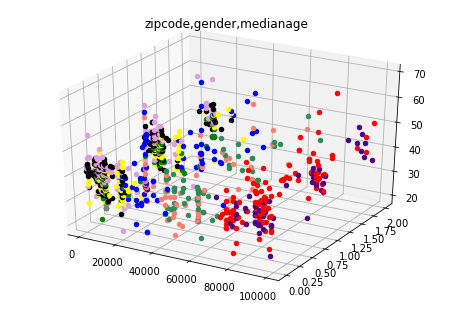

In [37]:
#3-D Plot of the customer clusters (gender, medianage, totalpop)
plot=plot3d(cCluster, 4, 1, 5, 1000, 'zipcode,gender,medianage')
plot

In [38]:
plt.close('all')

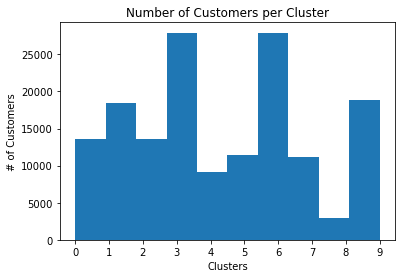

In [39]:
#Histogram of the number of customers in each cluster
df3=pd.DataFrame(cCluster.results, columns=cCluster.columns)
dist3=custPerCluster(df3)
dist3

Cluster the customers but remove certain householdids. Specifiy the features that will be used in the clustering. 

In [ ]:
#Elimate householdids from the data that will be clustered
#response=explorer.customers.statsByCustomer(householdid=['19885296','49927024'])

In [ ]:
#Show results from the query
#response.results

In [ ]:
#Cluster the results by customer
#cCluster_rmHID=explorer.customers.clusterCustomers(feature_set=response, n_clusters=7, 
#                                                   cluster_on=['gender','totalmales','totalfemales','totalpop'])

In [ ]:
#Get cluster stats
#df=pd.DataFrame(cCluster_rmHID.results, columns=cCluster_rmHID.columns )
#stats=clusterDist(df)
#stats

In [ ]:
#df['cluster'].unique()

In [ ]:
#cCluster_rmHID.columns

In [ ]:
#df.head()

In [ ]:
#3-D Plot of the customer clusters (gender, totalmales , totalfemales)
#plot=plot3d(cCluster_rmHID, 0, 1, 2, 1000, "3-D customer cluster plot (gender, totalmales, totalfemales)")
#plot

In [ ]:
#df2=pd.DataFrame(cCluster_rmHID.results, columns=cCluster_rmHID.columns)
#dist=custPerCluster(df2)
#dist